# Practical Lab 1: Univariate Linear Regression
**Name**: Babandeep 
**Student ID**: 9001552  
**Course**:  CSCN8010
**GitHub**: https://github.com/Babandeep16/Practical-Lab-1


## Problem Statement
The goal of this lab is to predict median house values in California using univariate linear regression. We will create separate models using the following features:
- Median Income (`MedInc`)
- Population (`Population`)
- Average Occupants per Household (`AveOccup`)


In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis

We’ll check distributions and create scatter plots to see which variables show linear relationships with the target (`MedHouseVal`).


In [16]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


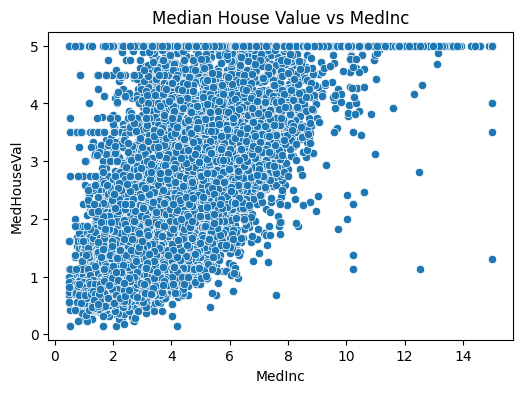

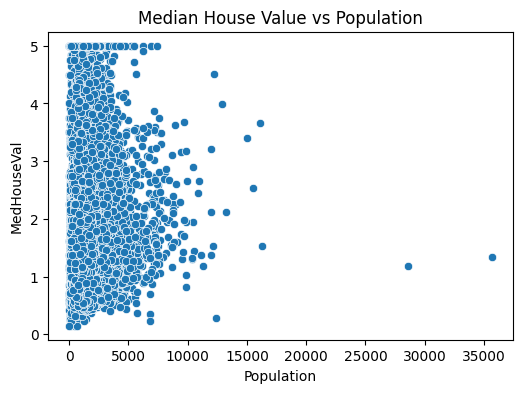

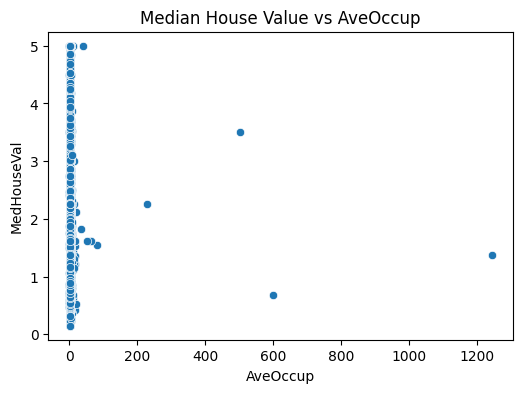

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df.describe()

features = ['MedInc', 'Population', 'AveOccup']  
for col in features:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y='MedHouseVal')
        plt.title(f'Median House Value vs {col}')
        plt.xlabel(col)
        plt.ylabel('MedHouseVal')
        plt.show()
    else:
        print(f" Column '{col}' not found in DataFrame.")



## Fit Linear Regression Models

We’ll fit a separate linear regression for each of the three features.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

results = []

for feature in features:
    X = df[[feature]]
    y = df['MedHouseVal']
    
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    results.append({
        'Feature': feature,
        'Intercept': model.intercept_,
        'Slope': model.coef_[0],
        'MSE': mse,
        'MAE': mae
    })

pd.DataFrame(results)


,Feature,Intercept,Slope,MSE,MAE
0,MedInc,0.450856,0.417938,0.701131,0.626259
1,Population,2.104363,-0.000025,1.330741,0.911538
2,AveOccup,2.076657,-0.002637,1.330800,0.911344


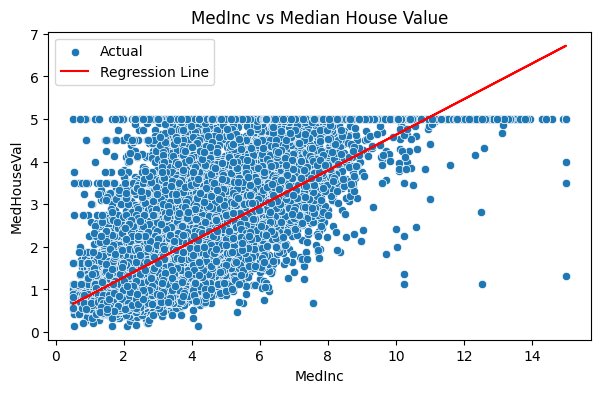

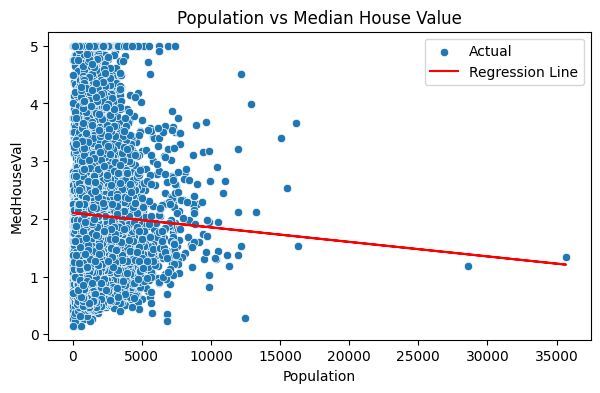

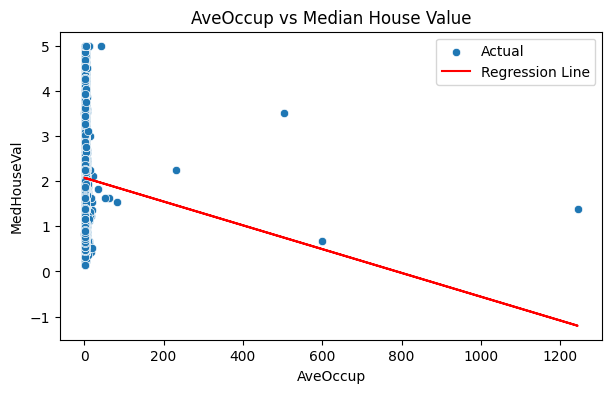

In [19]:
for feature in features:
    X = df[[feature]]
    y = df['MedHouseVal']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=X[feature], y=y, label="Actual")
    plt.plot(X[feature], y_pred, color='red', label='Regression Line')
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')
    plt.legend()
    plt.show()


## Conclusion
Among the three features tested:

- `MedInc` showed the **strongest linear relationship** with `MedHouseVal` and had the **lowest error** metrics.
- `Population` and `AveOccup` did not significantly improve predictions and had higher error values.
- Therefore, `MedInc` is the best single predictor for housing prices in this univariate analysis.

Recommendation: Use `MedInc` in further multivariate or production models.
